### 💎 Multi-Lattice Feature Extraction & Dataset Refinement

🌐 Global Research Scope

This research methodology is systematically executed across seven distinct crystal systems, extracting a high-dimensional feature set to capture the physical, electronic, and thermodynamic landscape of materials:

1. Cubic ($a=b=c, \alpha=\beta=\gamma=90^\circ$)

2. Tetragonal ($a=b\neq c, \alpha=\beta=\gamma=90^\circ$)
3. Orthorhombic ($a\neq b\neq c, \alpha=\beta=\gamma=90^\circ$)
4. Hexagonal ($a=b\neq c, \alpha=\beta=90^\circ, \gamma=120^\circ$)
5. Rhombohedral ($a=b=c, \alpha=\beta=\gamma\neq 90^\circ$)
6. Monoclinic ($a\neq b\neq c, \alpha=\gamma=90^\circ, \beta\neq 90^\circ$)
7. Triclinic ($a\neq b\neq c, \alpha\neq\beta\neq\gamma\neq 90^\circ$)

In [19]:
import pandas as pd

# 📥 Read data
material_data = pd.read_csv("data/crystal_datas.csv",index_col=0)  

C:\Users\kristal\AppData\Local\Temp\ipykernel_14288\68359032.py:4: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  material_data = pd.read_csv("data/crystal_datas.csv",index_col=0)


In [20]:
material_data[:1]["symmetry"].to_dict()

{0: "{'crystal_system': 'Triclinic', 'symbol': 'P1', 'hall': None, 'number': 1, 'point_group': '1', 'symprec': 0.1, 'angle_tolerance': 5.0, 'version': '2.6.0'}"}

In [21]:
import ast
import pandas as pd
from tqdm import tqdm

# 1. Metin (string) formatındaki veriyi gerçek sözlüğe (dict) çevirelim
# Not: Eğer veriler zaten sözlükse bu adım hata vermez, güvenlidir.
def safe_eval(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return None
    return x

print("🔄 Veri formatı dönüştürülüyor...")
temp_sym = material_data['symmetry'].apply(safe_eval)

# 2. Yeni sütunları oluşturma
material_data['crystal_system'] = temp_sym.apply(lambda x: x.get('crystal_system') if isinstance(x, dict) else None)
material_data['symbol'] = temp_sym.apply(lambda x: x.get('symbol') if isinstance(x, dict) else None)
material_data['space_group_number'] = temp_sym.apply(lambda x: x.get('number') if isinstance(x, dict) else None)

# Sonucu kontrol et
print("✅ İşlem tamamlandı!")
print(material_data[['material_id', 'crystal_system', 'space_group_number', "symbol"]].head(100))

🔄 Veri formatı dönüştürülüyor...
✅ İşlem tamamlandı!
   material_id crystal_system  space_group_number    symbol
0     mp-cqebf      Triclinic                   1        P1
1     mp-ckgno      Triclinic                   1        P1
2     mp-cpdha      Triclinic                   1        P1
3     mp-csvqb      Triclinic                   1        P1
4     mp-csvrg      Triclinic                   1        P1
..         ...            ...                 ...       ...
95    mp-bpmro     Monoclinic                  13      P2/c
96    mp-cpdqa     Monoclinic                  13      P2/c
97    mp-bglrg     Tetragonal                 134  P4_2/nnm
98     mp-bgpy     Tetragonal                 134  P4_2/nnm
99    mp-bgmcg     Tetragonal                 134  P4_2/nnm

[100 rows x 4 columns]


In [22]:
material_data.to_csv("data/crystal_datas_v2.csv")

### **🧪 Feature Vector Composition**
#### For each lattice structure, we retrieve and analyze a comprehensive suite of 16 key descriptors:

1. **Structural:** "nsites, nelements, volume, density, density_atomic"
2. **Magnetic:** "num_magnetic_sites, num_unique_magnetic_sites, total_magnetization, total_magnetization_normalized_vol, total_magnetization_normalized_formula_units"
3. **Thermodynamic:** "uncorrected_energy_per_atom, energy_per_atom, formation_energy_per_atom, energy_above_hull"
4. **Electronic:** "band_gap, efermi"

In [23]:
material_data = pd.read_csv("data/crystal_datas_v2.csv")

C:\Users\kristal\AppData\Local\Temp\ipykernel_14288\3763024939.py:1: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  material_data = pd.read_csv("data/crystal_datas_v2.csv")


In [24]:
# 🔍 Eşsiz crystal_system değerlerini al
unique_systems = material_data["crystal_system"].dropna().unique()
print("Unique crystal_system values:", unique_systems)

Unique crystal_system values: ['Triclinic' 'Monoclinic' 'Tetragonal' 'Trigonal' 'Hexagonal'
 'Orthorhombic' 'Cubic']


In [25]:

grouped_dfs = []
for i, system in enumerate(unique_systems):
    filtered_df = material_data[material_data["crystal_system"] == system].copy()
    grouped_dfs.append(filtered_df)
    globals()[f"df{i+1}"] = filtered_df

print(f"{len(grouped_dfs)} unique crystal_system values found and split into separate dataframes.")



7 unique crystal_system values found and split into separate dataframes.


In [26]:
for i, (system, group_df) in enumerate(zip(unique_systems, grouped_dfs), start=1):
    print(f"df{i}: crystal_system = '{system}', row count = {len(group_df)}")

df1: crystal_system = 'Triclinic', row count = 24149
df2: crystal_system = 'Monoclinic', row count = 36247
df3: crystal_system = 'Tetragonal', row count = 17446
df4: crystal_system = 'Trigonal', row count = 12980
df5: crystal_system = 'Hexagonal', row count = 10685
df6: crystal_system = 'Orthorhombic', row count = 32511
df7: crystal_system = 'Cubic', row count = 20861


In [33]:
import os

# Create a folder where files will be saved (optional, but keeps things organized)
output_folder = "data/data_separated"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save each group with its own name
for system, group_df in zip(unique_systems, grouped_dfs):
    # It is safe to clean spaces or special characters in the file name
    file_name = f"{system.lower()}_data.csv"
    file_path = os.path.join(output_folder, file_name)
    
    # Save the data
    group_df.to_csv(file_path, index=False)
    print(f"✅ {system} system saved as '{file_path}'. (Rows: {len(group_df)})")

✅ Triclinic system saved as 'data/data_separated\triclinic_data.csv'. (Rows: 24149)
✅ Monoclinic system saved as 'data/data_separated\monoclinic_data.csv'. (Rows: 36247)
✅ Tetragonal system saved as 'data/data_separated\tetragonal_data.csv'. (Rows: 17446)
✅ Trigonal system saved as 'data/data_separated\trigonal_data.csv'. (Rows: 12980)
✅ Hexagonal system saved as 'data/data_separated\hexagonal_data.csv'. (Rows: 10685)
✅ Orthorhombic system saved as 'data/data_separated\orthorhombic_data.csv'. (Rows: 32511)
✅ Cubic system saved as 'data/data_separated\cubic_data.csv'. (Rows: 20861)


In [30]:
import numpy as np
orthorhombic_data = pd.read_csv("data/data_separated/orthorhombic_data.csv")  

orthorhombic_data_numeric = orthorhombic_data.select_dtypes(include=[np.number])


C:\Users\kristal\AppData\Local\Temp\ipykernel_14288\4242455987.py:2: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  orthorhombic_data = pd.read_csv("data/data_separated/orthorhombic_data.csv")


In [31]:
orthorhombic_data_numeric.columns

Index(['Unnamed: 0', 'nsites', 'nelements', 'volume', 'density',
       'density_atomic', 'deprecation_reasons', 'uncorrected_energy_per_atom',
       'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull',
       'equilibrium_reaction_energy_per_atom', 'grain_boundaries', 'band_gap',
       'cbm', 'vbm', 'efermi', 'es_source_calc_id', 'dos_energy_up',
       'dos_energy_down', 'total_magnetization',
       'total_magnetization_normalized_vol',
       'total_magnetization_normalized_formula_units', 'num_magnetic_sites',
       'num_unique_magnetic_sites', 'universal_anisotropy',
       'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic', 'n',
       'e_ij_max', 'weighted_surface_energy_EV_PER_ANG2',
       'weighted_surface_energy', 'weighted_work_function',
       'surface_anisotropy', 'shape_factor', 'space_group_number'],
      dtype='object')

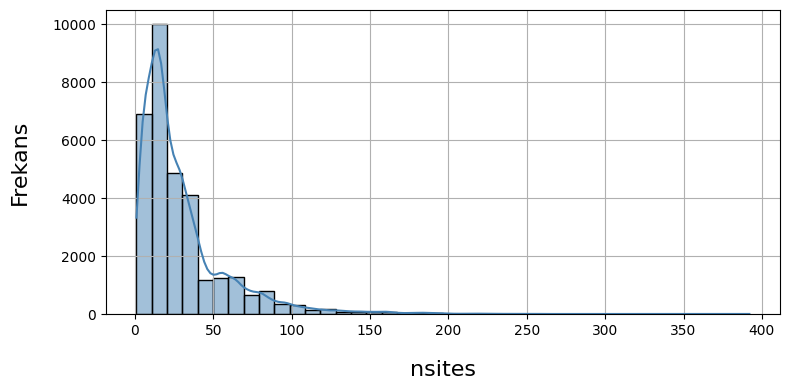

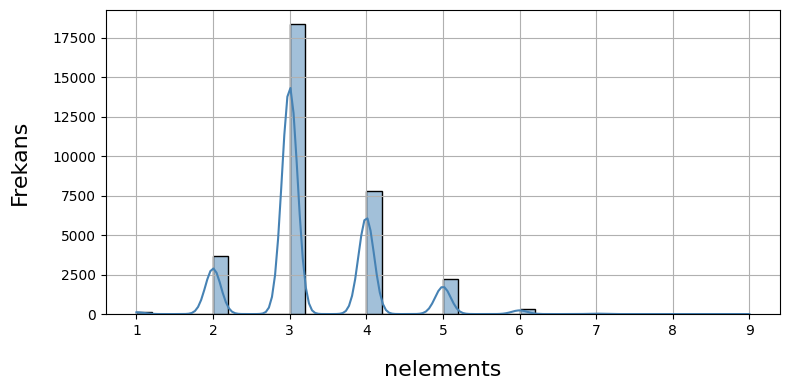

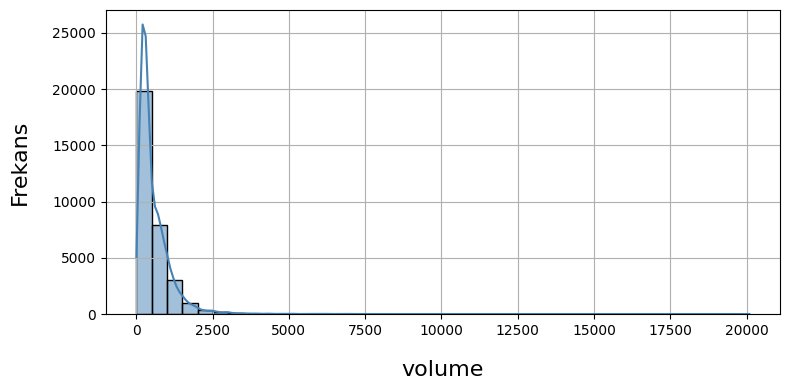

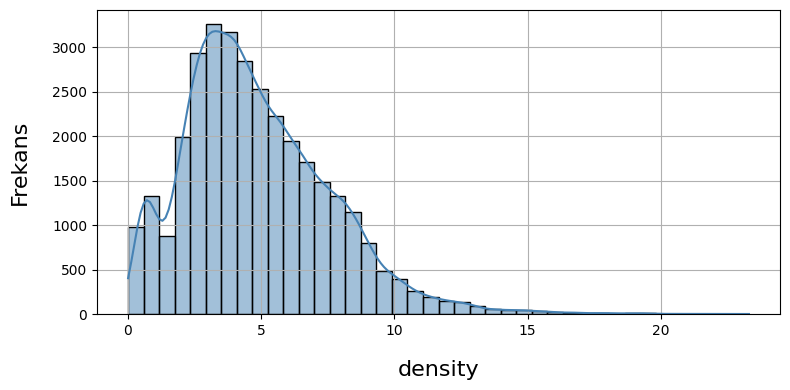

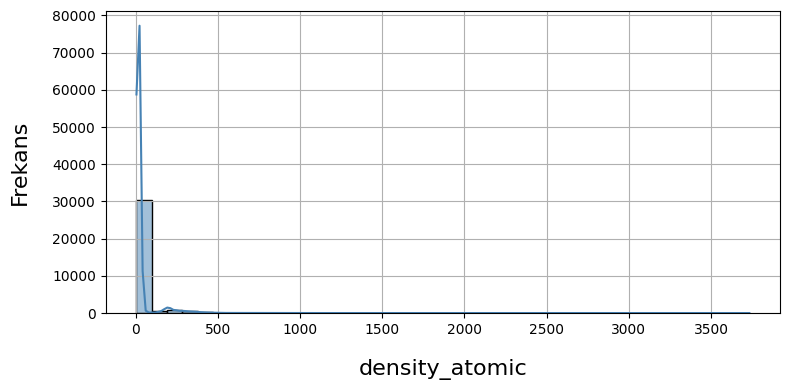

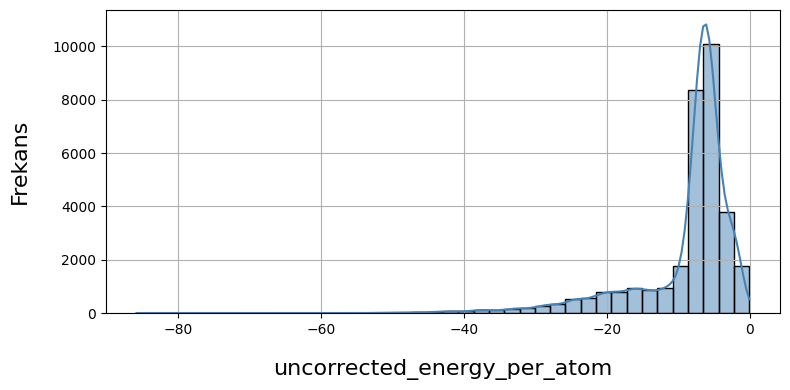

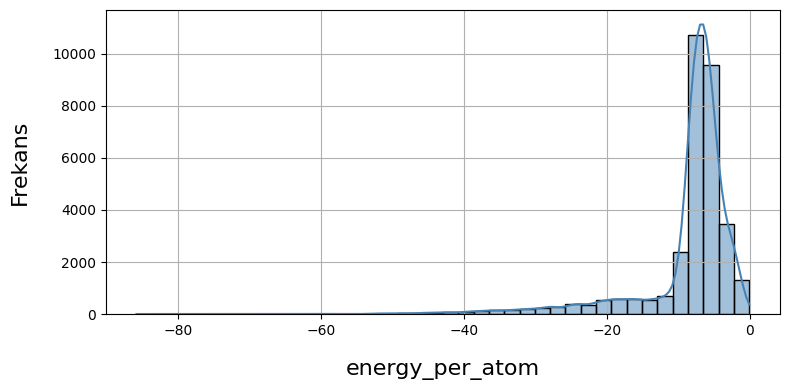

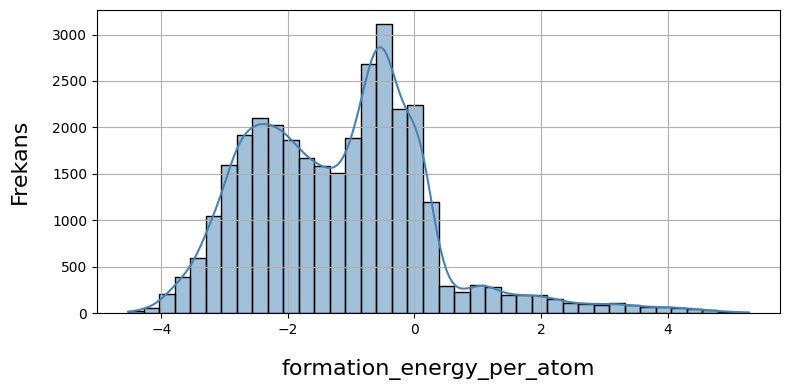

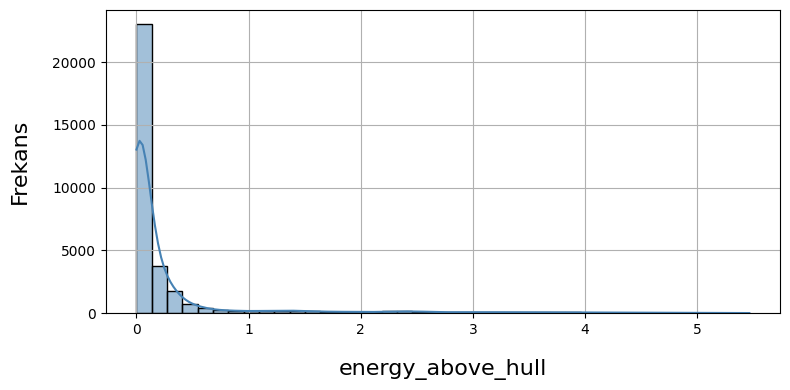

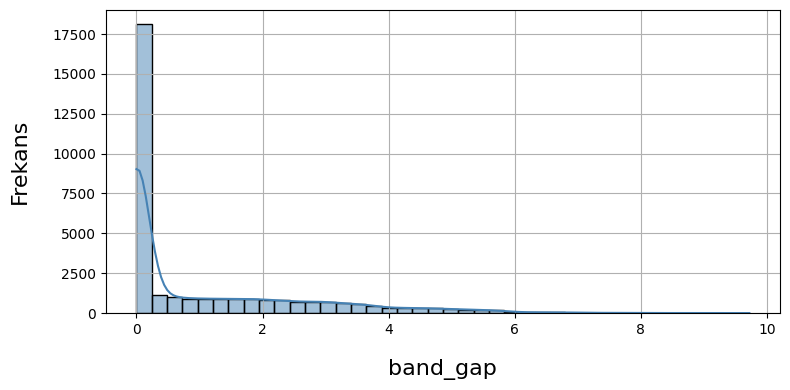

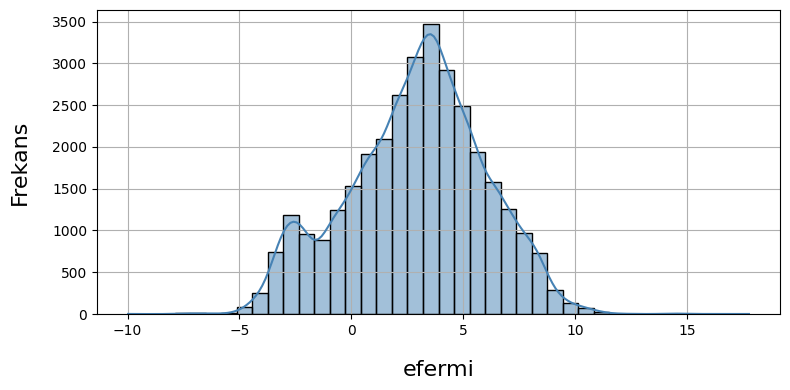

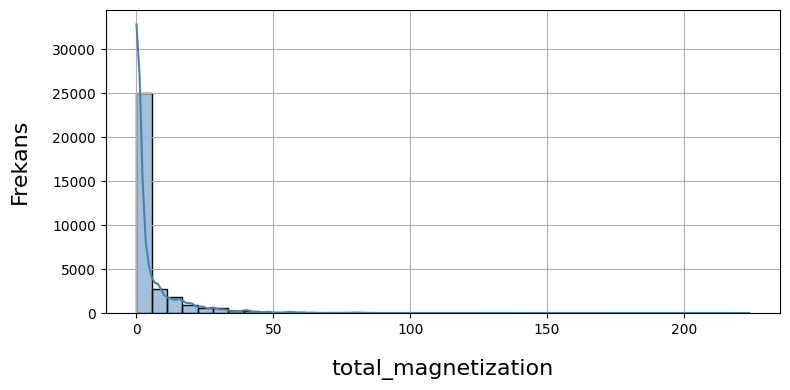

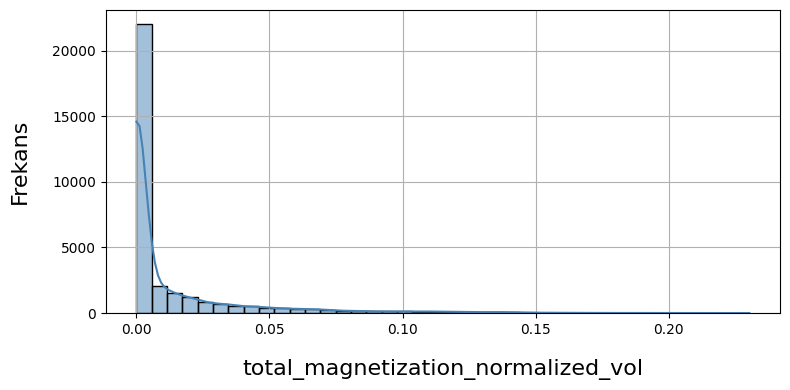

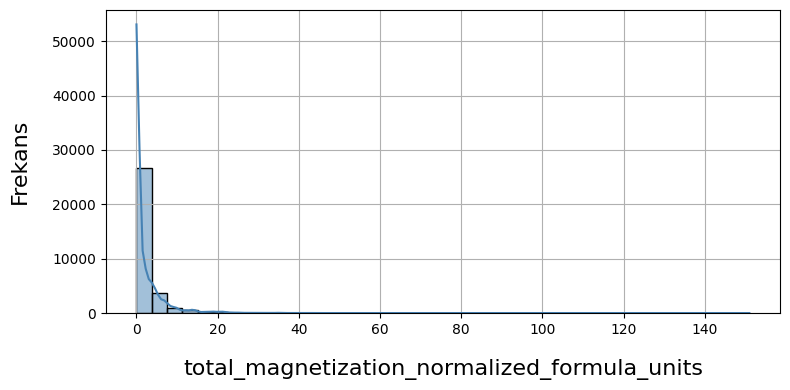

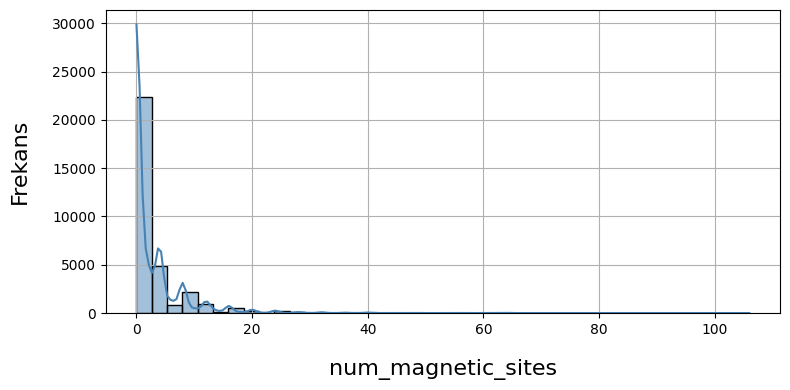

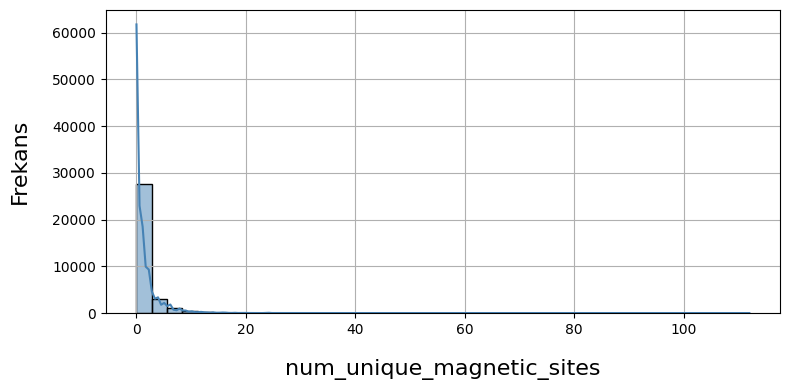

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_graph = ['nsites', 'nelements', 'volume', 'density',
       'density_atomic','uncorrected_energy_per_atom',
       'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull',
         'band_gap',
        'efermi',
        'total_magnetization',
       'total_magnetization_normalized_vol',
       'total_magnetization_normalized_formula_units', 'num_magnetic_sites',
       'num_unique_magnetic_sites']
for col in columns_to_graph:
    plt.figure(figsize=(8, 4))
    sns.histplot(orthorhombic_data_numeric[col], kde=True, bins=40, color='steelblue')
    plt.xlabel(col, fontsize=16, labelpad=16)  
    plt.ylabel("Frekans", fontsize=16, labelpad=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [35]:
print((orthorhombic_data_numeric["nsites"] > 120).sum())

594


In [36]:
df_clean = orthorhombic_data_numeric[(orthorhombic_data_numeric["nsites"].isna()) | (orthorhombic_data_numeric["nsites"] <= 120)]

In [37]:
print((df_clean["nelements"] > 6).sum())

25


In [38]:
df_clean = df_clean[(df_clean["nelements"].isna()) | (df_clean["nelements"] <= 6)]

In [39]:
print((df_clean["volume"] > 2000).sum())

448


In [40]:
df_clean = df_clean[(df_clean["volume"].isna()) | (df_clean["volume"] <= 2000)]

In [41]:
print((df_clean["density"] > 15).sum())

129


In [42]:
df_clean = df_clean[(df_clean["density"].isna()) | (df_clean["density"] <= 15)]

In [43]:
print((df_clean["density_atomic"] > 400).sum()) 

144


In [44]:
df_clean = df_clean[(df_clean["density_atomic"].isna()) | (df_clean["density_atomic"] <= 400)]

In [45]:
print((df_clean["num_magnetic_sites"] > 30).sum())

152


In [46]:
df_clean = df_clean[(df_clean["num_magnetic_sites"].isna()) | (df_clean["num_magnetic_sites"] <= 30)]


In [47]:
print((df_clean["num_unique_magnetic_sites"] > 20).sum())

42


In [48]:
df_clean = df_clean[(df_clean["num_unique_magnetic_sites"].isna()) | (df_clean["num_unique_magnetic_sites"] <= 20)]


In [49]:
print((df_clean["uncorrected_energy_per_atom"] < -40).sum())

168


In [50]:
df_clean = df_clean[(df_clean["uncorrected_energy_per_atom"].isna()) | (df_clean["uncorrected_energy_per_atom"] >= -40)]


In [51]:
print((df_clean["energy_per_atom"] < -40).sum())

110


In [52]:
df_clean = df_clean[(df_clean["energy_per_atom"].isna()) | (df_clean["energy_per_atom"] >= -40)]


In [53]:
print((df_clean["formation_energy_per_atom"] < -4.0).sum())

87


In [54]:
df_clean = df_clean[(df_clean["formation_energy_per_atom"].isna()) | (df_clean["formation_energy_per_atom"] >= -4.0)]


In [55]:
print((df_clean["formation_energy_per_atom"] > 4.0).sum())

155


In [56]:
df_clean = df_clean[(df_clean["formation_energy_per_atom"].isna()) | (df_clean["formation_energy_per_atom"] <= 4.0)]


In [57]:
print((df_clean["energy_above_hull"] > 1.5).sum()) ##0.5 öneriliyor


1502


In [58]:
df_clean = df_clean[(df_clean["energy_above_hull"].isna()) | (df_clean["energy_above_hull"] <= 1.5)]


In [59]:
print((df_clean["band_gap"] > 6.5).sum())

103


In [60]:
df_clean = df_clean[(df_clean["band_gap"].isna()) | (df_clean["band_gap"] <= 6.5)]


In [61]:
print((df_clean["efermi"] < -6).sum() + (df_clean["efermi"] > 11).sum())

18


In [62]:
df_clean = df_clean[(df_clean["efermi"].isna()) | ((df_clean["efermi"] >= -6) & (df_clean["efermi"] <= 11))]


In [63]:
print((df_clean["total_magnetization"] > 50).sum())

240


In [64]:
df_clean = df_clean[(df_clean["total_magnetization"].isna()) | (df_clean["total_magnetization"] <= 50)]


In [65]:
print((df_clean["total_magnetization_normalized_vol"] > 0.13).sum())

246


In [66]:
df_clean = df_clean[(df_clean["total_magnetization_normalized_vol"].isna()) | (df_clean["total_magnetization_normalized_vol"] <= 0.13)]


In [67]:
print((df_clean["total_magnetization_normalized_formula_units"] > 20).sum())

159


In [68]:
df_clean = df_clean[(df_clean["total_magnetization_normalized_formula_units"].isna()) | (df_clean["total_magnetization_normalized_formula_units"] <= 20)]


In [69]:
df_clean_numeric = df_clean.select_dtypes(include=[np.number])

In [70]:
df_clean_numeric.corr()

,Unnamed: 0,nsites,nelements,volume,density,density_atomic,deprecation_reasons,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,...,e_ionic,e_electronic,n,e_ij_max,weighted_surface_energy_EV_PER_ANG2,weighted_surface_energy,weighted_work_function,surface_anisotropy,shape_factor,space_group_number
Unnamed: 0,1.000000,0.364255,0.960589,0.223190,-0.194587,-0.075848,NaN,0.257253,0.220337,-0.396749,...,-0.000077,-0.035384,-0.113673,0.040837,-0.007107,-0.007107,0.642770,0.719027,0.719956,-0.065285
nsites,0.364255,1.000000,0.395084,0.788669,-0.256852,-0.165995,NaN,0.156112,0.111442,-0.309082,...,-0.044567,-0.039110,-0.115707,-0.097689,-0.399781,-0.399781,0.335888,0.979805,0.980077,-0.111670
nelements,0.960589,0.395084,1.000000,0.237337,-0.218016,-0.105940,NaN,0.268963,0.216462,-0.384389,...,-0.005400,-0.046749,-0.145793,0.019647,NaN,NaN,NaN,NaN,NaN,-0.208594
volume,0.223190,0.788669,0.237337,1.000000,-0.290219,0.262629,NaN,0.116844,0.077159,-0.074039,...,-0.048523,-0.017305,-0.005706,-0.121767,-0.815644,-0.815644,-0.698414,0.282519,0.280394,-0.017488
density,-0.194587,-0.256852,-0.218016,-0.290219,1.000000,-0.202549,NaN,-0.545377,-0.396117,0.064198,...,0.141942,0.082957,0.290440,0.095598,0.671715,0.671715,0.534132,-0.256395,-0.253671,0.185309
density_atomic,-0.075848,-0.165995,-0.105940,0.262629,-0.202549,1.000000,NaN,0.077571,-0.080010,0.288999,...,-0.015105,0.016693,0.111740,-0.050583,-0.528289,-0.528289,-0.914187,-0.372086,-0.374194,0.140453
deprecation_reasons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uncorrected_energy_per_atom,0.257253,0.156112,0.268963,0.116844,-0.545377,0.077571,NaN,1.000000,0.411088,0.012529,...,-0.052552,-0.050187,-0.201206,0.016021,-0.619188,-0.619188,-0.791367,-0.026831,-0.028533,-0.212696
energy_per_atom,0.220337,0.111442,0.216462,0.077159,-0.396117,-0.080010,NaN,0.411088,1.000000,-0.048438,...,-0.034146,-0.083248,-0.205657,-0.018481,-0.583524,-0.583524,-0.799730,-0.087877,-0.089573,-0.124185
formation_energy_per_atom,-0.396749,-0.309082,-0.384389,-0.074039,0.064198,0.288999,NaN,0.012529,-0.048438,1.000000,...,-0.102596,0.104101,0.291463,-0.067115,0.161526,0.161526,0.096876,-0.156278,-0.154970,0.056960


In [71]:
df_clean.to_csv("data/data_separated/orthorhombic_clear.csv", index=False)

#### The above process is repeated for each crystal group.

In [79]:
import pandas as pd
import glob
import os

# Define the path
path = "data/data_separated/"
all_files = glob.glob(os.path.join(path, "*_clear.csv"))

# Check if all 7 crystal groups are processed
if len(all_files) < 7:
    print(f"Warning: Only {len(all_files)} files found. Each group has not been cleaned and saved yet; merge cannot be performed.")
else:
    # Combine all selected CSV files
    df_combined = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
    df_combined.to_csv("data/crystal_datas_v3.csv")
    print(f"Success! Combined {len(all_files)} files. Total rows: {len(df_combined)}")

Success! Combined 7 files. Total rows: 128856
